# Decision Tree Lab

In [1]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import io
import requests
import re
from sklearn.metrics import log_loss

## 1 Debug and Eval

### 1.1 (5%) Debug 

- Train a DecisionTreeClassifier on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff) using all default parameters.
- If using Dataframes you may want to change the class values from bytecodes to strings with
iris_df['class'] = iris_df['class'].str.decode('utf-8') 

Expected Accuracy = [1.0]


In [2]:
#Debug
clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))


1.0


### 1.2 (5%) Evaluation 

- Train on the iris data set again but this time with max_depth = 3 and output the accuracy

In [3]:
# Evaluation
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9666666666666667


#### Discussion
What did you see? What were the differences in accuracy between the two trained models? How do you account for the differences or no differences? 

When we set the max depth to 3, we limited the information that the model was able to gain by traversing through larger trees. When we didn't set a limit, we allowed for the model to create splits where it found best, when we limit the depth, it affects where the model chooses to split.

## 2. Missing Values, N-fold CV, and Decision Tree Items  

### 2.1 (15%) Handling missing values
- Use this [Voting Dataset with missing values](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting_with_missing.arff)
- This data set has missing data.  Create an extra feature value for each feature with missing data. For example, if the feature were color with possible values R, G, B, you would add a fourth value (e.g. U or ? for unknown).
- Do not use a stopping criteria. Induce the tree as far as it can go (until classes are pure or there are no more data or attributes to split on).
- SKlearn does not allow nominal features, which initially seems odd. However, SKlearn uses the binary CART algorithm where a nominal data value like color is broken down into blue or not blue, red or not red, etc.  It is thus natural to just use one-hot encoding for each nominal feature.
- Use an 80/20 train/test split.
- Report the training and test set accuracies.

In [4]:
# Learn Voting with missing values.
url = "https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting_with_missing.arff"
response = requests.get(url)
data, meta = arff.loadarff(io.StringIO(response.text))

voting_df = pd.DataFrame(data)

voting_df.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,b'n',b'y',b'n',b'y',b'y',b'y',b'n',b'n',b'n',b'y',b'?',b'y',b'y',b'y',b'n',b'y',b'republican'
1,b'n',b'y',b'n',b'y',b'y',b'y',b'n',b'n',b'n',b'n',b'n',b'y',b'y',b'y',b'n',b'?',b'republican'
2,b'?',b'y',b'y',b'?',b'y',b'y',b'n',b'n',b'n',b'n',b'y',b'n',b'y',b'y',b'n',b'n',b'democrat'
3,b'n',b'y',b'y',b'n',b'?',b'y',b'n',b'n',b'n',b'n',b'y',b'n',b'y',b'n',b'n',b'y',b'democrat'
4,b'y',b'y',b'y',b'n',b'y',b'y',b'n',b'n',b'n',b'n',b'y',b'?',b'y',b'y',b'y',b'y',b'democrat'


In [5]:
voting_df.isnull().sum() #no missing values

handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-corporation-cutback              0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
Class                                     0
dtype: int64

In [6]:
voting_df # "missing" is u meaning that they didn't vote

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,b'n',b'y',b'n',b'y',b'y',b'y',b'n',b'n',b'n',b'y',b'?',b'y',b'y',b'y',b'n',b'y',b'republican'
1,b'n',b'y',b'n',b'y',b'y',b'y',b'n',b'n',b'n',b'n',b'n',b'y',b'y',b'y',b'n',b'?',b'republican'
2,b'?',b'y',b'y',b'?',b'y',b'y',b'n',b'n',b'n',b'n',b'y',b'n',b'y',b'y',b'n',b'n',b'democrat'
3,b'n',b'y',b'y',b'n',b'?',b'y',b'n',b'n',b'n',b'n',b'y',b'n',b'y',b'n',b'n',b'y',b'democrat'
4,b'y',b'y',b'y',b'n',b'y',b'y',b'n',b'n',b'n',b'n',b'y',b'?',b'y',b'y',b'y',b'y',b'democrat'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,b'n',b'n',b'y',b'y',b'y',b'y',b'n',b'n',b'y',b'y',b'n',b'y',b'y',b'y',b'n',b'y',b'republican'
431,b'n',b'n',b'y',b'n',b'n',b'n',b'y',b'y',b'y',b'y',b'n',b'n',b'n',b'n',b'n',b'y',b'democrat'
432,b'n',b'?',b'n',b'y',b'y',b'y',b'n',b'n',b'n',b'n',b'y',b'y',b'y',b'y',b'n',b'y',b'republican'
433,b'n',b'n',b'n',b'y',b'y',b'y',b'?',b'?',b'?',b'?',b'n',b'y',b'y',b'y',b'n',b'y',b'republican'


In [44]:
voting_df.dtypes

handicapped-infants                       object
water-project-cost-sharing                object
adoption-of-the-budget-resolution         object
physician-fee-freeze                      object
el-salvador-aid                           object
religious-groups-in-schools               object
anti-satellite-test-ban                   object
aid-to-nicaraguan-contras                 object
mx-missile                                object
immigration                               object
synfuels-corporation-cutback              object
education-spending                        object
superfund-right-to-sue                    object
crime                                     object
duty-free-exports                         object
export-administration-act-south-africa    object
Class                                     object
dtype: object

In [45]:
voting_df = voting_df.applymap(
    lambda x: x.decode() if isinstance(x, bytes) else str(x)
)

/var/folders/k7/x49c0yv57hj65yffwj4nw6k00000gn/T/ipykernel_1695/850410611.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  voting_df = voting_df.applymap(


In [46]:
voting_df.dtypes
voting_df

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,democrat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y,republican
431,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y,democrat
432,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y,republican
433,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y,republican


In [47]:
for col in voting_df.columns:
        voting_df[col] = voting_df[col].replace('?','U')
voting_df

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,n,y,n,y,y,y,n,n,n,y,U,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,U,republican
2,U,y,y,U,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,U,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,U,y,y,y,y,democrat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y,republican
431,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y,democrat
432,n,U,n,y,y,y,n,n,n,n,y,y,y,y,n,y,republican
433,n,n,n,y,y,y,U,U,U,U,n,y,y,y,n,y,republican


In [48]:
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(voting_df)
encoded_voting_df = pd.DataFrame(encoded_features,columns=encoder.get_feature_names_out())
encoded_voting_df

,handicapped-infants_U,handicapped-infants_n,handicapped-infants_y,water-project-cost-sharing_U,water-project-cost-sharing_n,water-project-cost-sharing_y,adoption-of-the-budget-resolution_U,adoption-of-the-budget-resolution_n,adoption-of-the-budget-resolution_y,physician-fee-freeze_U,...,crime_n,crime_y,duty-free-exports_U,duty-free-exports_n,duty-free-exports_y,export-administration-act-south-africa_U,export-administration-act-south-africa_n,export-administration-act-south-africa_y,Class_democrat,Class_republican
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
431,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
432,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
433,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [49]:
clf = DecisionTreeClassifier(random_state=0)
X = encoded_voting_df.drop(['Class_republican',"Class_democrat"], axis=1)
y = encoded_voting_df['Class_republican']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print("Train accuracy:", clf.score(X_train, y_train))
print("Test accuracy:", clf.score(X_test, y_test))

0.9425287356321839
Train accuracy: 1.0
Test accuracy: 0.9425287356321839


#### Discussion
Report on your accuracies and include explaining how the missing values were handled by your model

I replaced the ? with u and then used one-hot encoding so the ? were taken into account. My training accuracy was 100% and the test accuracy was 94.25%. The model took the U into account when evalutating the model.

### 2.2 (15%)  N-fold Cross Validation
- Learn the [Cars Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/cars.arff) with the decision tree.
- Create a table with the 10-fold cross validation accuracies and show the average predicted accuracy.
- Try it again with 5-fold CV and create and show that table also.

In [50]:
url = "https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/cars.arff"
response = requests.get(url)
data, meta = arff.loadarff(io.StringIO(response.text))

cars_df = pd.DataFrame(data)

cars_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,b'vhigh',b'vhigh',b'2',b'2',b'small',b'low',b'unacc'
1,b'vhigh',b'vhigh',b'2',b'2',b'small',b'med',b'unacc'
2,b'vhigh',b'vhigh',b'2',b'2',b'small',b'high',b'unacc'
3,b'vhigh',b'vhigh',b'2',b'2',b'med',b'low',b'unacc'
4,b'vhigh',b'vhigh',b'2',b'2',b'med',b'med',b'unacc'


In [51]:
cars_df = cars_df.applymap(
    lambda x: x.decode() if isinstance(x, bytes) else str(x)
)
cars_df

/var/folders/k7/x49c0yv57hj65yffwj4nw6k00000gn/T/ipykernel_1695/3894247582.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cars_df = cars_df.applymap(


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [52]:
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(cars_df)
encoded_cars_df = pd.DataFrame(encoded_features,columns=encoder.get_feature_names_out())
encoded_cars_df

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med,class_acc,class_good,class_unacc,class_vgood
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1724,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1726,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [53]:
from sklearn.model_selection import cross_val_score, KFold

X_cars = encoded_cars_df.drop(['class_unacc', 'class_acc', 'class_good', 'class_vgood'], axis=1)
y_cars = encoded_cars_df['class_unacc']

encoded_clf_cars = DecisionTreeClassifier(max_depth=5, random_state=0)

scores_10 = cross_val_score(encoded_clf_cars, X_cars, y_cars, cv=10)
print(f"Mean CV accuracy: {scores_10.mean():.3f}")

scores_5 = cross_val_score(encoded_clf_cars, X_cars, y_cars, cv=5)
print(f"Mean CV accuracy: {scores_5.mean():.3f}")



Mean CV accuracy: 0.870
Mean CV accuracy: 0.855


#### Discussion
Explain n-fold cross validation. Why do we do it? How is it useful? What does it reveal? Do we end up with a model? If so, which one? 

n-fold cross validation is used to evaluate a machine learning model by splitting the dataset into n subsets. The model is then trained multiple time using a different "fold" for testing and the other folds for training for each iteration. The accuracy we get is the average accuracy that we get across all of the "folds". This is useful as it is multiple iterations of the same model, this way you can really test to see if it is a good model or not.

### 2.3 (10%) Decision Tree Intuition
For each of the two problems above (Voting and Cars):
- Print the full tree for each.  You may use tree.plot_tree(clf) or [another way](https://mljar.com/blog/visualize-decision-tree/) if you prefer.  tree.plot_tree has a number of parameters which you can try which let you print more informative trees which can help your discussion.
- Train both again with max_depth = 2 and print these smaller trees and include them in your report.
- Summarize in English what these 2 smaller decision trees have learned (i.e. look at the induced trees and describe what "rules" they discovered). 
- Compare your thoughts on important features with the attribute feature_importances_

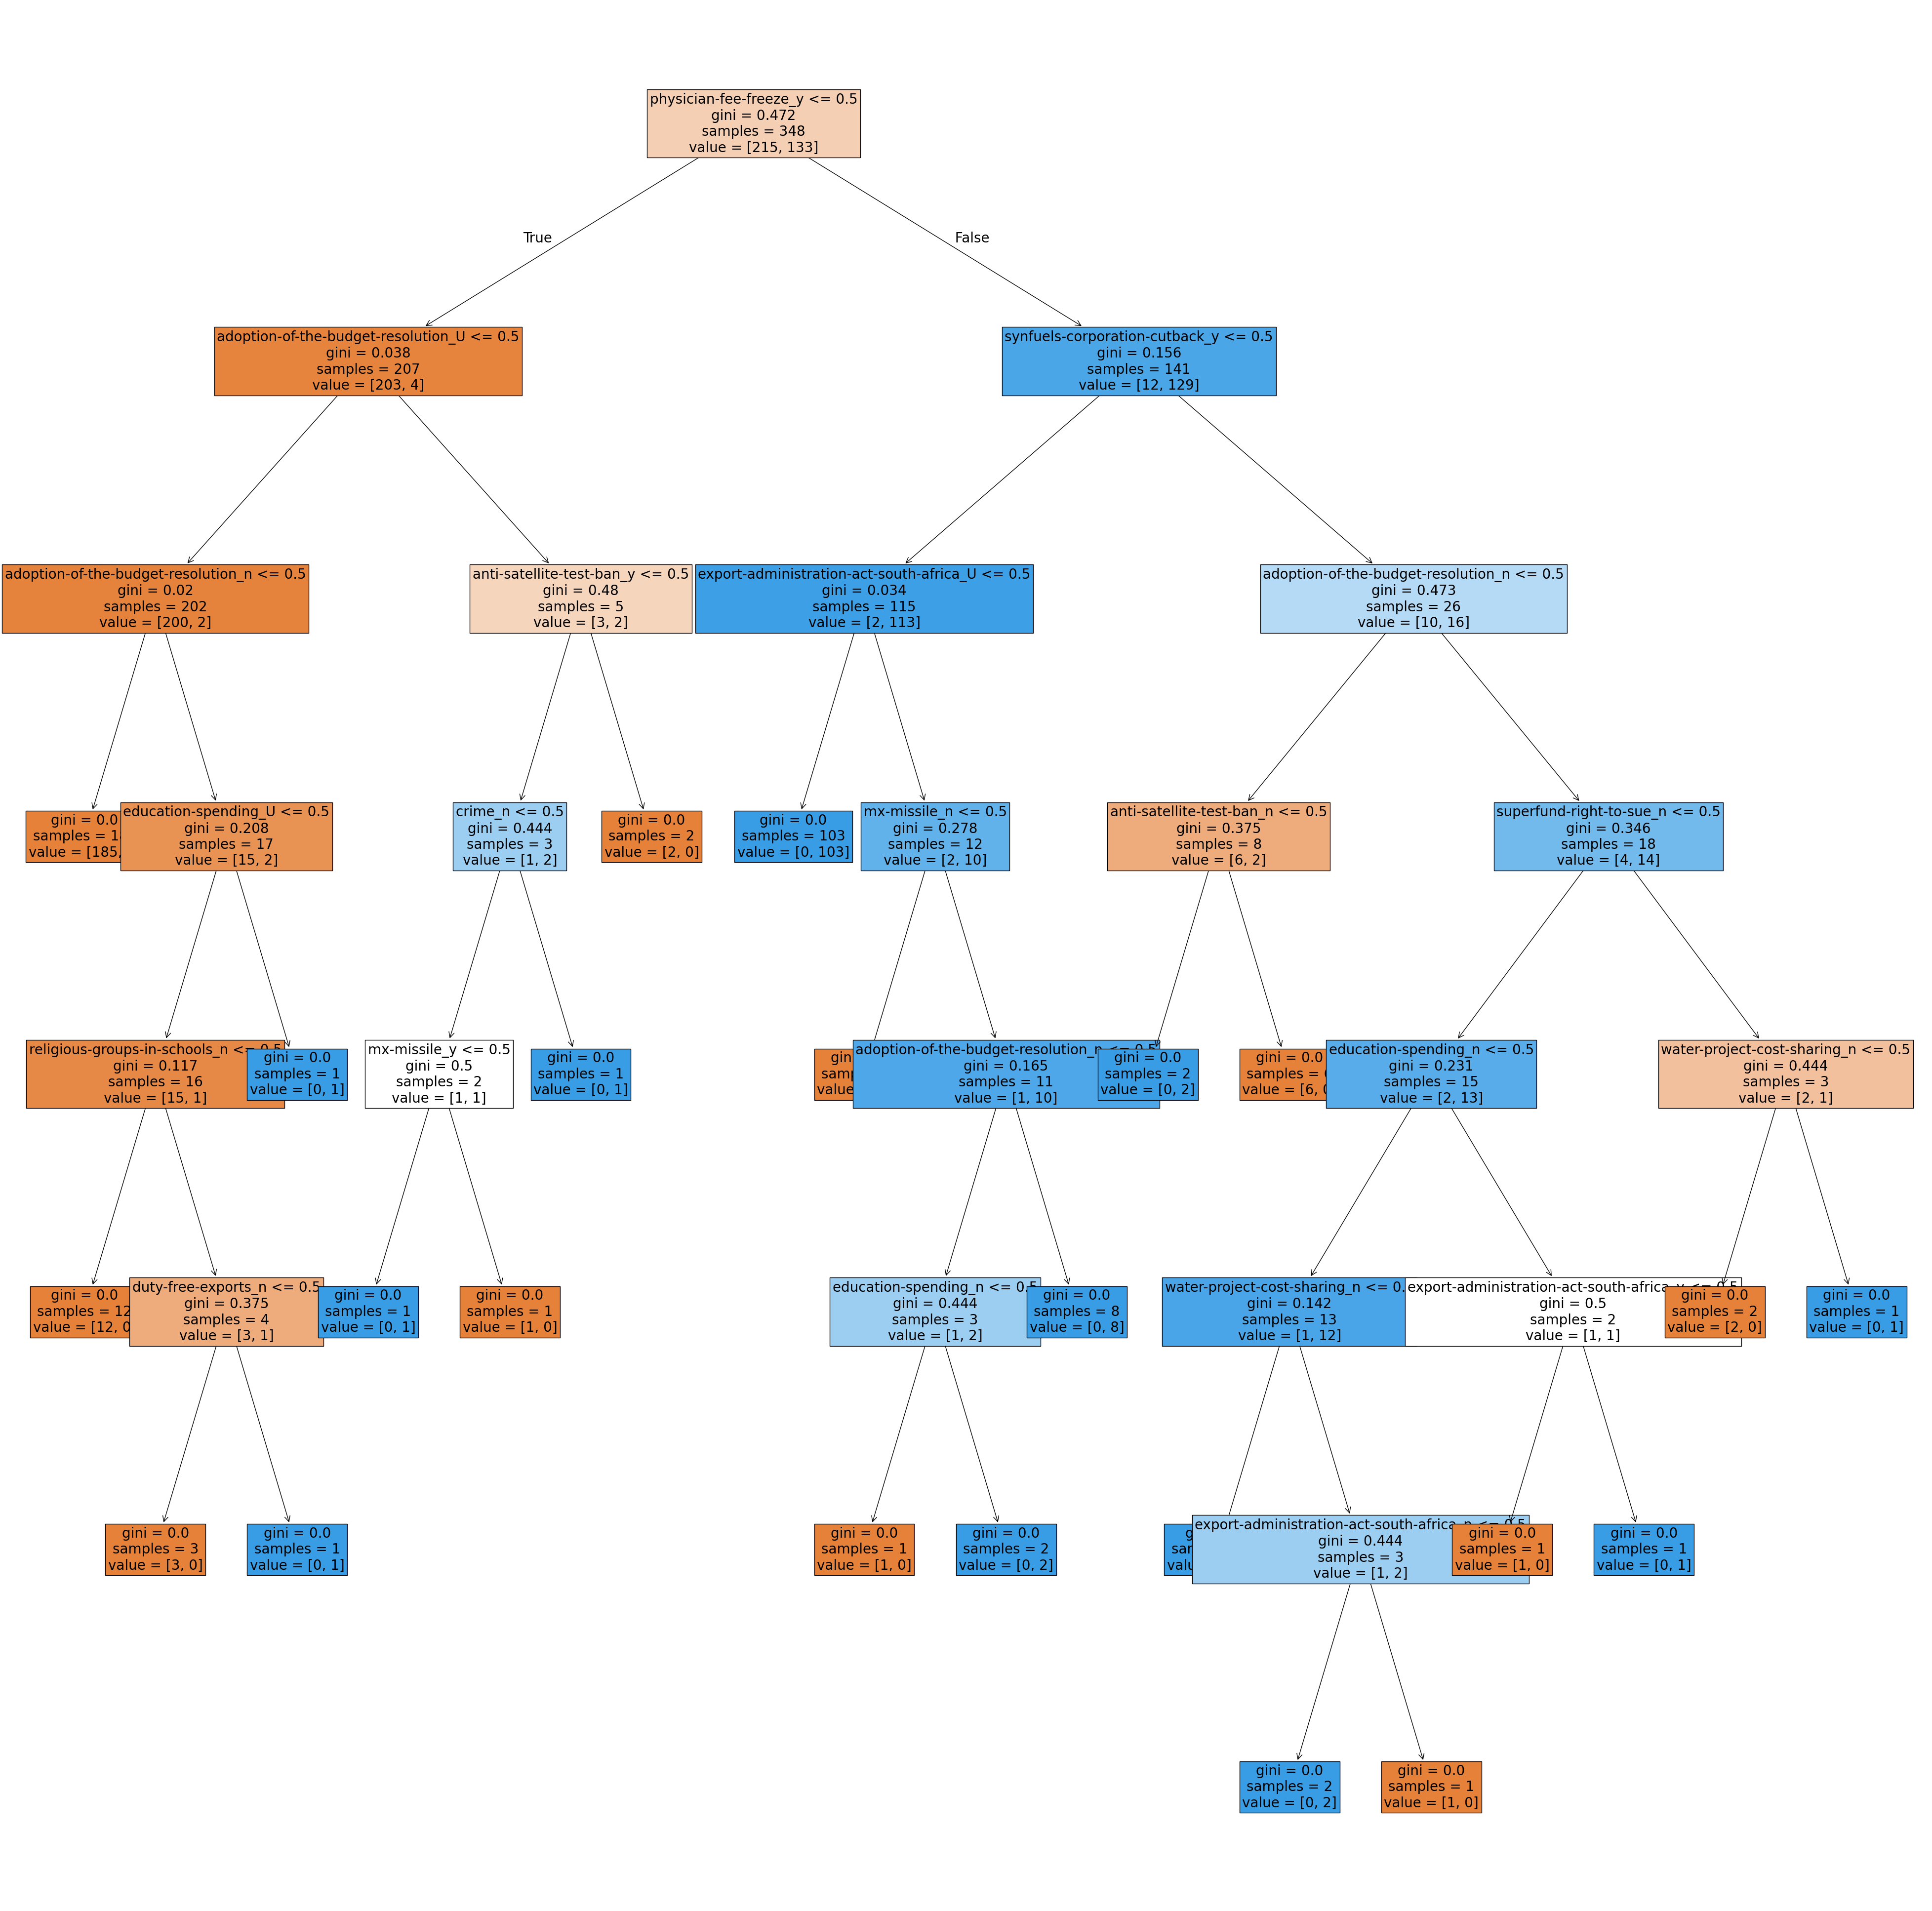

In [54]:
#Print induced trees for the voting and car data sets
from sklearn import tree
plt.figure(figsize=(50, 50))
tree.plot_tree(clf,feature_names=encoded_voting_df.columns, filled=True, fontsize=20)
plt.show()

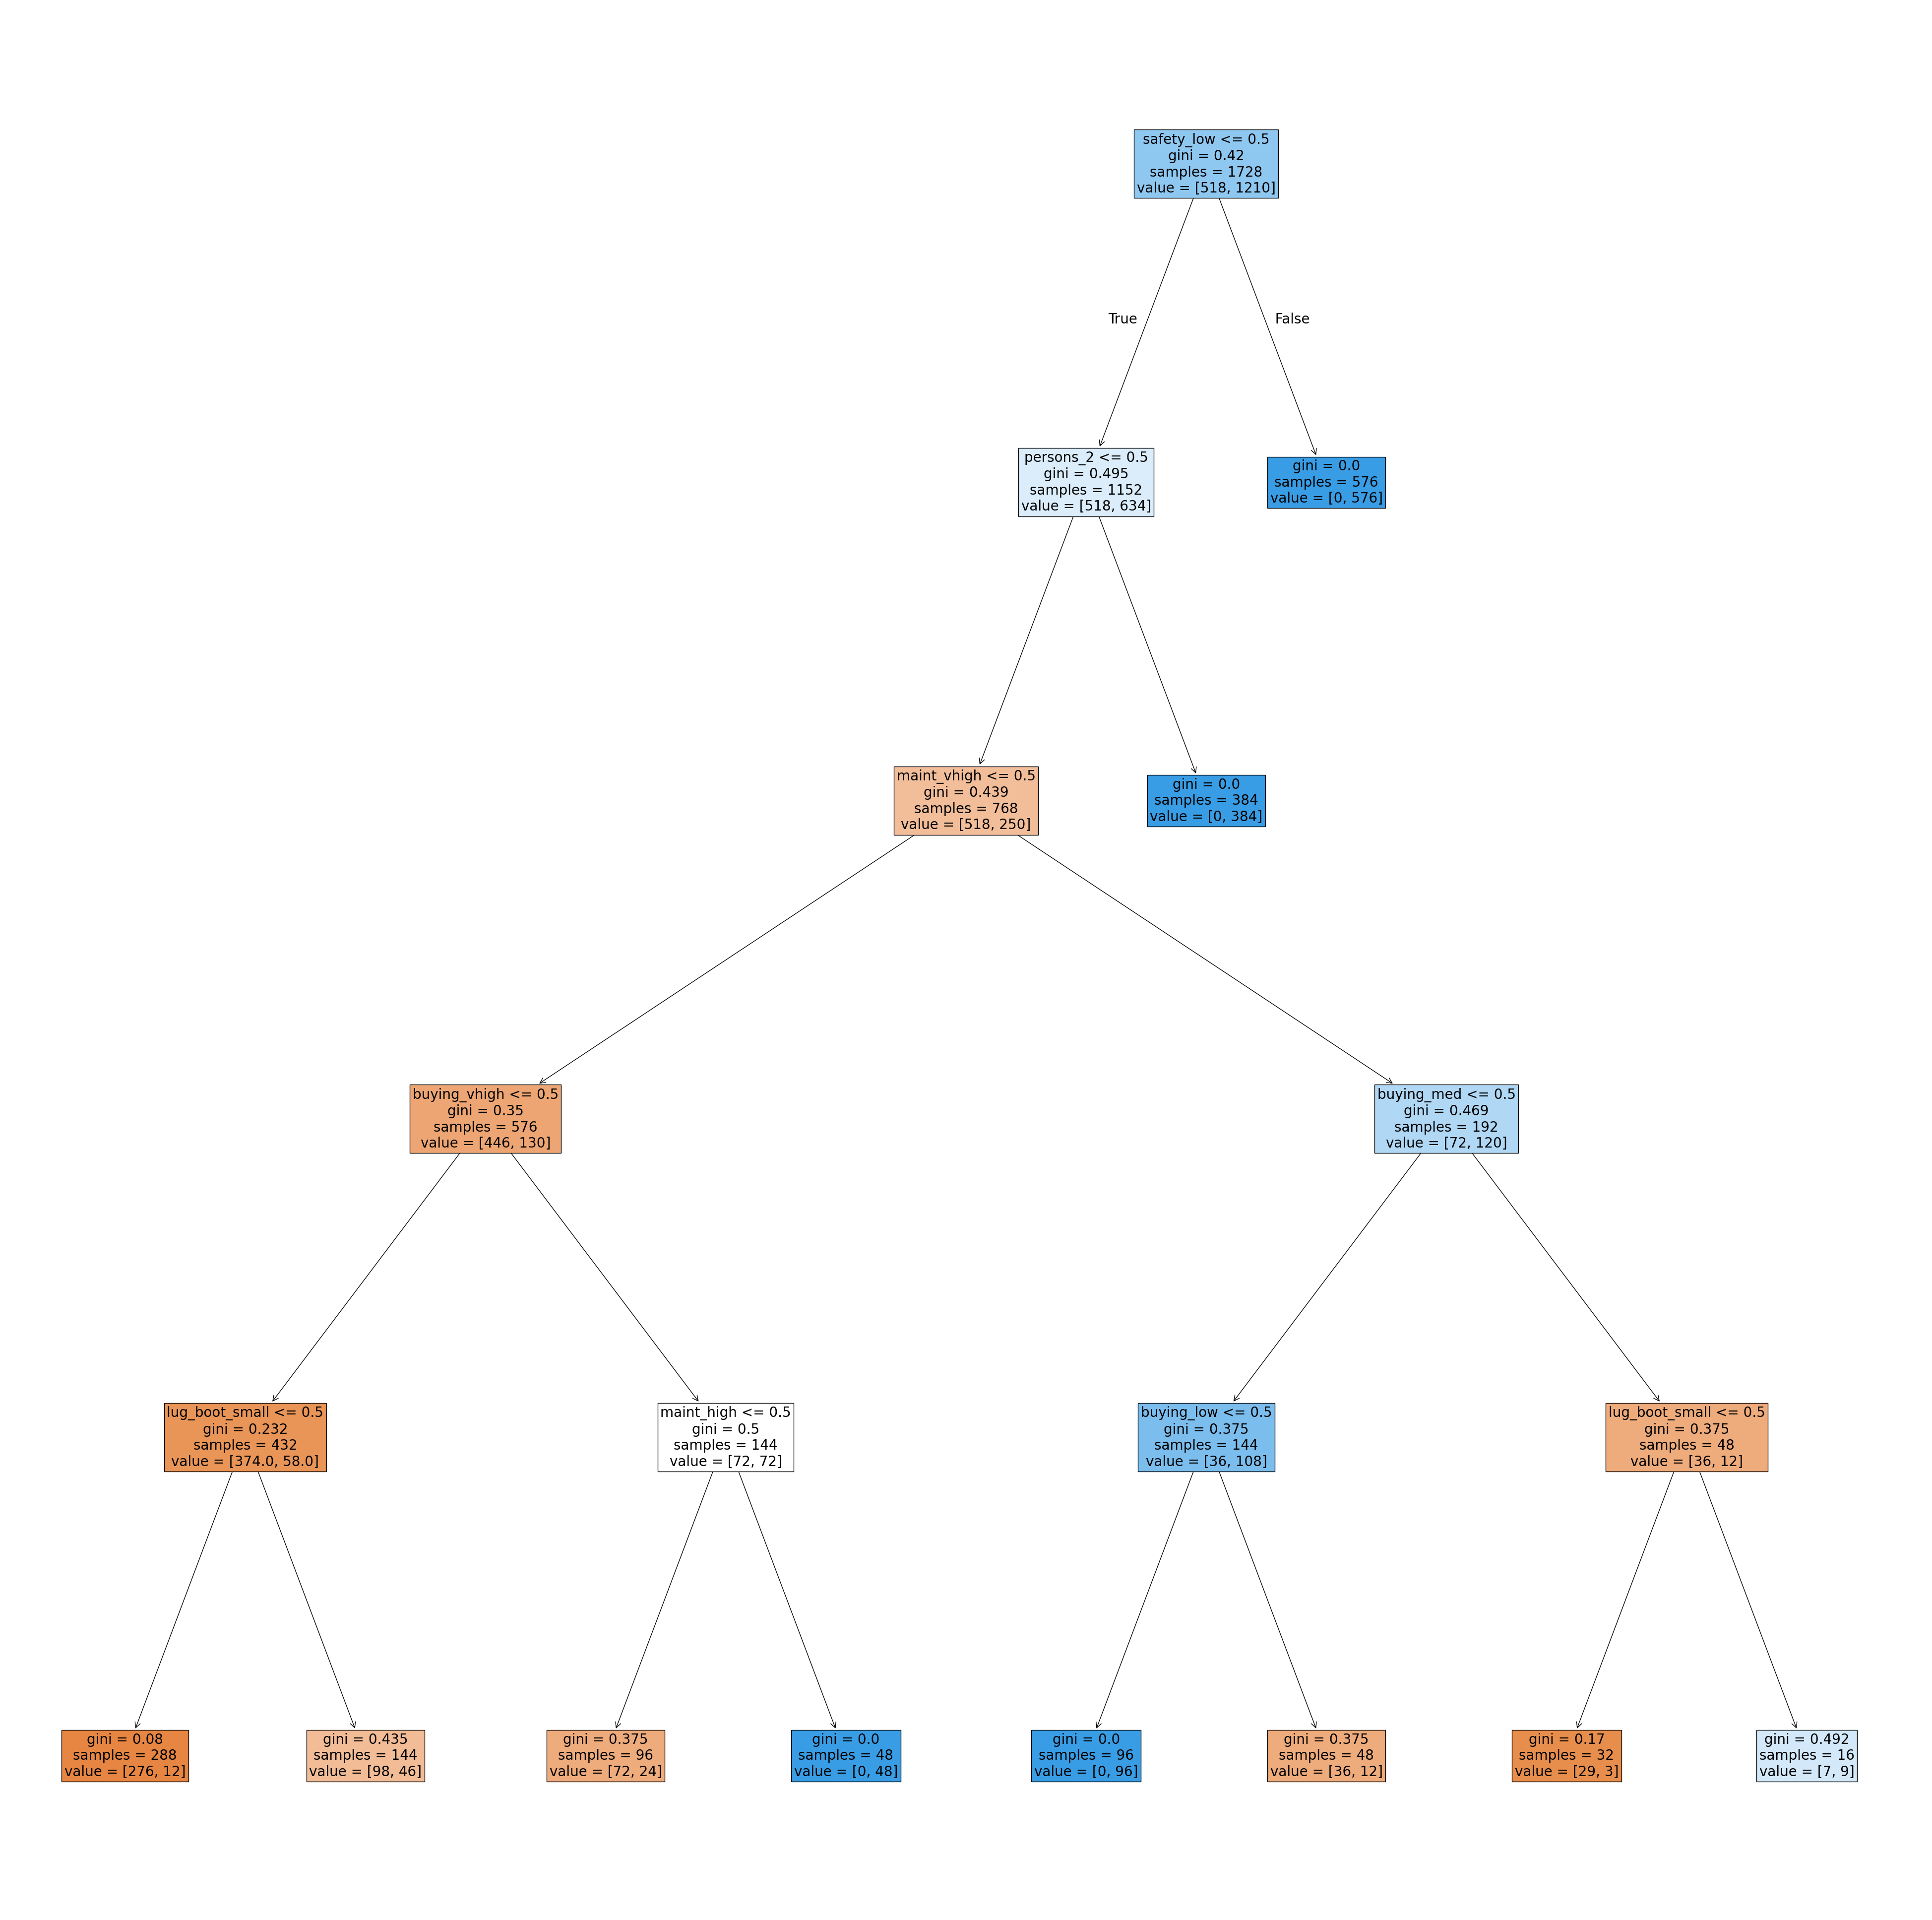

In [55]:
encoded_clf_cars.fit(X_cars, y_cars)
plt.figure(figsize=(50, 50))
tree.plot_tree(encoded_clf_cars, feature_names=X_cars.columns, filled=True, fontsize=20)
plt.show()

#### Discussion 
Discuss what the Trees have learned on the 2 data sets (i.e. look at the induced trees and describe what "rules" they discovered). How do the important features you would think about correspond to the "feature_importances_"

From the tree, it appears that the model decided safety to be the most informative and so that was our first split. Our second split seems to be whether or not the car is two person. This is followed by if it had high maintaince costs. I thought it was interesting that at that point, it splits and uses different splittings. I think that there correspont to the feature_imporantance because the level of importance determines whether or not the split will be used and if it is, in what order will the splits be.

### 2.4 (5%) Other Parameters
- For either of the data sets above experiment and discuss using a different split criterion (Compare Entropy and Log-loss with Gini)

In [56]:
# Experiment with criterion parameter
# Experiment with criterion parameter
criteria = ['gini', 'entropy', 'log_loss']

X = encoded_voting_df.drop(['Class_republican',"Class_democrat"], axis=1)
y = encoded_voting_df['Class_republican']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

for crit in criteria:
    clf = DecisionTreeClassifier(criterion=crit, random_state=0)
    clf.fit(X_train, y_train)

    print(f"\nCriterion: {crit}")
    print("Train accuracy:", clf.score(X_train, y_train))
    print("Test accuracy:", clf.score(X_test, y_test))
    print("Total number of nodes:", clf.tree_.node_count)
    print("Maximum tree depth:", clf.tree_.max_depth)


Criterion: gini
Train accuracy: 1.0
Test accuracy: 0.9425287356321839
Total number of nodes: 45
Maximum tree depth: 7

Criterion: entropy
Train accuracy: 1.0
Test accuracy: 0.9195402298850575
Total number of nodes: 41
Maximum tree depth: 9

Criterion: log_loss
Train accuracy: 1.0
Test accuracy: 0.9195402298850575
Total number of nodes: 41
Maximum tree depth: 9


#### Discussion
How does using different split criteria (entropy, log-loss, and gini) affect accuracy, tree structure, and feature importance?

Using the different splits of entropy, log-loss and gini, the number of nodes and the depth of the tree was similar. For entropy and log-loss the results were exactly the same, the gini splitting criteria did slightly better and had more nodes but less depth. After looking into it a little bit, this makes sense that the entropy and lof-loss results would be the saem as mathematically they are essentially the same.

## 3 Overfit Avoidance with Decision Trees  

Above, you found typical training and test set scores for the Cars data set when the tree is induced as far as it can go (until classes are pure or there are no more data or attributes to split on).  This usually leads to great training set scores but can potentially overfit and get lower accuracy on the test set.  You will now experiment with methods which can help avoid overfit and which could lead to better test set accuracy (though training set accuracy may decrease).  

### 3.1 Smaller and Simpler Trees (20%) 
- tree_: [Read about](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py) the tree_ attribute with its sub attributes and methods allowing you to interact with your learned tree.  You don't have to do any specific task for this part.
- Use an 80/20 train/test split for all experiments in this part and induce (learn/fit) the full tree for Cars.
- For the fully induced tree print out
    - Training set accuracy
    - Test set accuracy
    - Total number of nodes (clf.tree_.node_count)
    - Maximum tree depth (clf.tree_.max_depth)
- Experiment with the following parameters which lead to smaller and/or simpler trees which can help with overfit.  Try a few different values of each parameter and compare their train and test set accuracies and number of nodes and depth with the fully induced tree.  If you are not sure how parameters are actually working, print some trees to see their effect.  Due to the simplicity of the Cars data set you may not see as great of accuracy improvements as you would for cases where overfit is more prominent.  
    - min_samples_leaf
    - min_samples_split
    - min_impurity_decrease
- Try these parameters also, but note that they could lead to underfit
    - max_depth
    - max_leaf_nodes
    - max_features

In [57]:
# Explore different overfit parameters
X_car_train, X_car_test, y_car_train, y_car_test = train_test_split(X_cars, y_cars, test_size=0.2, random_state=42)
encoded_clf_cars = DecisionTreeClassifier(random_state=0)
encoded_clf_cars.fit(X_car_train, y_car_train)
print("Train accuracy:", encoded_clf_cars.score(X_car_train, y_car_train))
print("Test accuracy:", encoded_clf_cars.score(X_car_test, y_car_test))
print("Total number of nodes:", encoded_clf_cars.tree_.node_count)
print("Maximum tree depth:", encoded_clf_cars.tree_.max_depth)

Train accuracy: 1.0
Test accuracy: 0.9826589595375722
Total number of nodes: 109
Maximum tree depth: 13


In [58]:
min_leaves = (1,30,50,100)
X_car_train, X_car_test, y_car_train, y_car_test = train_test_split(X_cars, y_cars, test_size=0.2, random_state=42)
for leaf in min_leaves:
    encoded_clf_cars = DecisionTreeClassifier(random_state=0,min_samples_leaf=leaf)
    encoded_clf_cars.fit(X_car_train, y_car_train)
    print("Train accuracy:", encoded_clf_cars.score(X_car_train, y_car_train))
    print("Test accuracy:", encoded_clf_cars.score(X_car_test, y_car_test))
    print("Total number of nodes:", encoded_clf_cars.tree_.node_count)
    print("Maximum tree depth:", encoded_clf_cars.tree_.max_depth,"\n")

Train accuracy: 1.0
Test accuracy: 0.9826589595375722
Total number of nodes: 109
Maximum tree depth: 13 

Train accuracy: 0.9356005788712012
Test accuracy: 0.9566473988439307
Total number of nodes: 25
Maximum tree depth: 7 

Train accuracy: 0.8972503617945007
Test accuracy: 0.8901734104046243
Total number of nodes: 21
Maximum tree depth: 7 

Train accuracy: 0.8806078147612156
Test accuracy: 0.8930635838150289
Total number of nodes: 13
Maximum tree depth: 6 



In [59]:
min_samples = (2,30,50,100)
X_car_train, X_car_test, y_car_train, y_car_test = train_test_split(X_cars, y_cars, test_size=0.2, random_state=42)
for sample in min_samples:
    encoded_clf_cars = DecisionTreeClassifier(random_state=0,min_samples_split=sample)
    encoded_clf_cars.fit(X_car_train, y_car_train)
    print("Train accuracy:", encoded_clf_cars.score(X_car_train, y_car_train))
    print("Test accuracy:", encoded_clf_cars.score(X_car_test, y_car_test))
    print("Total number of nodes:", encoded_clf_cars.tree_.node_count)
    print("Maximum tree depth:", encoded_clf_cars.tree_.max_depth,"\n")

Train accuracy: 1.0
Test accuracy: 0.9826589595375722
Total number of nodes: 109
Maximum tree depth: 13 

Train accuracy: 0.9565846599131693
Test accuracy: 0.9421965317919075
Total number of nodes: 39
Maximum tree depth: 8 

Train accuracy: 0.951519536903039
Test accuracy: 0.9682080924855492
Total number of nodes: 33
Maximum tree depth: 8 

Train accuracy: 0.9356005788712012
Test accuracy: 0.9566473988439307
Total number of nodes: 23
Maximum tree depth: 7 



In [60]:
min_decrease = (.0005,.2,.0000000001,.0001)
X_car_train, X_car_test, y_car_train, y_car_test = train_test_split(X_cars, y_cars, test_size=0.2, random_state=42)
for decrease in min_decrease:
    encoded_clf_cars = DecisionTreeClassifier(random_state=0,min_impurity_decrease=decrease)
    encoded_clf_cars.fit(X_car_train, y_car_train)
    print("Train accuracy:", encoded_clf_cars.score(X_car_train, y_car_train))
    print("Test accuracy:", encoded_clf_cars.score(X_car_test, y_car_test))
    print("Total number of nodes:", encoded_clf_cars.tree_.node_count)
    print("Maximum tree depth:", encoded_clf_cars.tree_.max_depth,"\n")

Train accuracy: 0.9963820549927641
Test accuracy: 0.9913294797687862
Total number of nodes: 87
Maximum tree depth: 11 

Train accuracy: 0.7054992764109985
Test accuracy: 0.6791907514450867
Total number of nodes: 1
Maximum tree depth: 0 

Train accuracy: 1.0
Test accuracy: 0.9826589595375722
Total number of nodes: 109
Maximum tree depth: 13 

Train accuracy: 1.0
Test accuracy: 0.9826589595375722
Total number of nodes: 109
Maximum tree depth: 13 



In [61]:
max_depth = (2,5,1,11)
X_car_train, X_car_test, y_car_train, y_car_test = train_test_split(X_cars, y_cars, test_size=0.2, random_state=42)
for depth in max_depth:
    encoded_clf_cars = DecisionTreeClassifier(random_state=0,max_depth=depth)
    encoded_clf_cars.fit(X_car_train, y_car_train)
    print("Train accuracy:", encoded_clf_cars.score(X_car_train, y_car_train))
    print("Test accuracy:", encoded_clf_cars.score(X_car_test, y_car_test))
    print("Total number of nodes:", encoded_clf_cars.tree_.node_count)
    print("Maximum tree depth:", encoded_clf_cars.tree_.max_depth,"\n")

Train accuracy: 0.849493487698987
Test accuracy: 0.8786127167630058
Total number of nodes: 5
Maximum tree depth: 2 

Train accuracy: 0.9312590448625181
Test accuracy: 0.9624277456647399
Total number of nodes: 19
Maximum tree depth: 5 

Train accuracy: 0.7054992764109985
Test accuracy: 0.6791907514450867
Total number of nodes: 3
Maximum tree depth: 1 

Train accuracy: 0.9992764109985528
Test accuracy: 0.9826589595375722
Total number of nodes: 105
Maximum tree depth: 11 



In [62]:
max_leaf = (2,50,11,15)
X_car_train, X_car_test, y_car_train, y_car_test = train_test_split(X_cars, y_cars, test_size=0.2, random_state=42)
for leaf in max_leaf:
    encoded_clf_cars = DecisionTreeClassifier(random_state=0,max_leaf_nodes=leaf)
    encoded_clf_cars.fit(X_car_train, y_car_train)
    print("Train accuracy:", encoded_clf_cars.score(X_car_train, y_car_train))
    print("Test accuracy:", encoded_clf_cars.score(X_car_test, y_car_test))
    print("Total number of nodes:", encoded_clf_cars.tree_.node_count)
    print("Maximum tree depth:", encoded_clf_cars.tree_.max_depth,"\n")

Train accuracy: 0.7054992764109985
Test accuracy: 0.6791907514450867
Total number of nodes: 3
Maximum tree depth: 1 

Train accuracy: 0.9985528219971056
Test accuracy: 0.9884393063583815
Total number of nodes: 99
Maximum tree depth: 13 

Train accuracy: 0.9464544138929089
Test accuracy: 0.976878612716763
Total number of nodes: 21
Maximum tree depth: 7 

Train accuracy: 0.9623733719247467
Test accuracy: 0.9855491329479769
Total number of nodes: 29
Maximum tree depth: 8 



In [63]:
max_features = (2,5,1,11)
X_car_train, X_car_test, y_car_train, y_car_test = train_test_split(X_cars, y_cars, test_size=0.2, random_state=42)
for feat in max_features:
    encoded_clf_cars = DecisionTreeClassifier(random_state=0,max_features=feat)
    encoded_clf_cars.fit(X_car_train, y_car_train)
    print("Train accuracy:", encoded_clf_cars.score(X_car_train, y_car_train))
    print("Test accuracy:", encoded_clf_cars.score(X_car_test, y_car_test))
    print("Total number of nodes:", encoded_clf_cars.tree_.node_count)
    print("Maximum tree depth:", encoded_clf_cars.tree_.max_depth,"\n")

Train accuracy: 1.0
Test accuracy: 0.7976878612716763
Total number of nodes: 1051
Maximum tree depth: 15 

Train accuracy: 1.0
Test accuracy: 0.930635838150289
Total number of nodes: 387
Maximum tree depth: 15 

Train accuracy: 1.0
Test accuracy: 0.8439306358381503
Total number of nodes: 949
Maximum tree depth: 15 

Train accuracy: 1.0
Test accuracy: 0.9682080924855492
Total number of nodes: 189
Maximum tree depth: 13 



#### Discussion
How did the methods used above help avoid overfit? How do you know? How did they affect accuracy (training and test) and tree structure? Which parameters helped the most with each dataset? How do you know?

Using the different methods with no other method enforced, it was interesting to see the different effects that
were seen. With the min_leaf method enforced, with the numbers that I used, the accuracies between training and testing were very similar. With the min_samples method, the training accuracy was less than 100% (for all but one) and the test accuracy was fairly close to the training accuracy. With the min_decrease we found that the higher the value, the lower the training and test accuracies. There seems to be a sweet-spot around .0005 where the training accuracy and the test accuracy are both similar while having the training not be 100%. With limiting the depth of the tree, for 2 of the 4 values used, the test accuracy was higher than the training accuracy, we saw something similiar with the max_leaf_nodes method being enforced. With limiting the number of features, the results varied not only in accuracy but also the amount of nodes and the depth of the tree.

### 3.2 (10%) Tree Reduction
Another approach to avoiding overfit is using pruning to reduce fully induced trees.  Induce the tree fully for Cars (no simplifying parameters such as max_depth).  Prune by setting the [ccp_alpha](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py) parameter to a positive value. This parameter controls how aggressive the pruning is. Try some small values (e.g. ,001, ,005, etc.) and try to find and report the value which works the best.  Make a table with at least 5 ccp_alpha values and for each value include
- Training set accuracy (you chooses the size of the train/test split)
- Test set accuracy
- Total number of nodes (clf.tree_.node_count)
- Maximum tree depth (clf.tree_.max_depth)

In [64]:
# Pruning
alpha_vals = (0.001,0.005,0.01,0.05,0.1,0.5,1)
X_car_train, X_car_test, y_car_train, y_car_test = train_test_split(X_cars, y_cars, test_size=0.2, random_state=42)
for alpha in alpha_vals:
    train_test_split(X_cars, y_cars, test_size=0.2, random_state=42)
    encoded_clf_cars = DecisionTreeClassifier(random_state=0,ccp_alpha=alpha)
    encoded_clf_cars.fit(X_car_train, y_car_train)
    print("ccp_alpha:", alpha)
    print("Train accuracy:", encoded_clf_cars.score(X_car_train, y_car_train))
    print("Test accuracy:", encoded_clf_cars.score(X_car_test, y_car_test))
    print("Total number of nodes:", encoded_clf_cars.tree_.node_count)
    print("Total tree depth:", encoded_clf_cars.tree_.max_depth,"\n")

ccp_alpha: 0.001
Train accuracy: 0.9956584659913169
Test accuracy: 0.9826589595375722
Total number of nodes: 85
Total tree depth: 11 

ccp_alpha: 0.005
Train accuracy: 0.9623733719247467
Test accuracy: 0.9855491329479769
Total number of nodes: 29
Total tree depth: 8 

ccp_alpha: 0.01
Train accuracy: 0.9305354558610709
Test accuracy: 0.9710982658959537
Total number of nodes: 15
Total tree depth: 5 

ccp_alpha: 0.05
Train accuracy: 0.849493487698987
Test accuracy: 0.8786127167630058
Total number of nodes: 5
Total tree depth: 2 

ccp_alpha: 0.1
Train accuracy: 0.849493487698987
Test accuracy: 0.8786127167630058
Total number of nodes: 5
Total tree depth: 2 

ccp_alpha: 0.5
Train accuracy: 0.7054992764109985
Test accuracy: 0.6791907514450867
Total number of nodes: 1
Total tree depth: 0 

ccp_alpha: 1
Train accuracy: 0.7054992764109985
Test accuracy: 0.6791907514450867
Total number of nodes: 1
Total tree depth: 0 



#### Discussion
How did the pruning parameter ccp_alpha affect accuracy and tree structure? How does that compare to the methods above?

The cc_alpha had a big affect on the accuracy and tree structure, as our alpha values increased, we saw a decrease in the total number of nodes, the total depth of the tree and the accuracy for training and testing. At lower values, we saw that the tree was more complex with a greater depth and more nodes. At high values, the number of nodes decreases as well as the depth of the tree. With our largest value of 1, there was only 1 node and no additional depth, this also applied when we used an alpha value of 0.5. Compared to other methods used earlier, in general, when we used lower values, we got higher accuracies, higher number of nodes and greater depth.

## 4. Decision Tree Regression
### 4.1 (15%) Learn a real-world regression data set of your choice (not already used in this or previous labs)
- Report tree statistics (# of nodes, # of leaf nodes, max depth)
- Report MAE on the training and test set (you choose the size of the train/test split)
- Report the DT regressor score for the training and test set.  Note that for the DT regressor this score is the coefficient of determination. Google it if you are curious.

In [65]:
#Learn regression data set
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
%pip install pydataset
from pydataset import data
heights = pd.DataFrame(data("GaltonFamilies"))
heights

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


,family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,001,78.5,67.0,75.43,4,1,male,73.2
2,001,78.5,67.0,75.43,4,2,female,69.2
3,001,78.5,67.0,75.43,4,3,female,69.0
4,001,78.5,67.0,75.43,4,4,female,69.0
5,002,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...
930,203,62.0,66.0,66.64,3,1,male,64.0
931,203,62.0,66.0,66.64,3,2,female,62.0
932,203,62.0,66.0,66.64,3,3,female,61.0
933,204,62.5,63.0,65.27,2,1,male,66.5


In [66]:
X = heights.drop(['childHeight'], axis=1)
y = heights['childHeight']

# Convert categorical variables to numeric with one-hot encoding
X_processed = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=0)

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

print("Train accuracy:", regressor.score(X_train, y_train))
print("Test accuracy:", regressor.score(X_test, y_test))


Train accuracy: 1.0
Test accuracy: 0.5782527212767892


In [67]:
# Tree statistics
tree = regressor.tree_
total_nodes = tree.node_count
leaf_nodes = sum(tree.children_left == -1)
max_depth = tree.max_depth

print("Total nodes:", total_nodes)
print("Leaf nodes:", leaf_nodes)
print("Maximum tree depth:", max_depth)

Total nodes: 1185
Leaf nodes: 593
Maximum tree depth: 30


In [68]:
# Predictions
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [69]:
# Metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = regressor.score(X_train, y_train)
test_r2 = regressor.score(X_test, y_test)

print(f"Train MAE: {train_mae:}")
print(f"Test MAE: {test_mae:}")
print(f"Train R^2 score: {train_r2:}")
print(f"Test R^2 score: {test_r2:}")

Train MAE: 0.0
Test MAE: 1.713903743315508
Train R^2 score: 1.0
Test R^2 score: 0.5782527212767892


#### Discussion
Discuss your choice of dataset and regression feature. Also discuss the items listed above in 4.1

I chose the Galton Families dataset, this dataset was part of a study of heredity. The task I gave the model was to predict the height of a child given the different features given. These features were dad height, mom height, birth order, gender and # children. We found the MAE for testing to be higher than the training, this is a clear sign of overfitting. The R^2 test was also lower than the training. This shows that with little to no tuning, our model does ok but not great. With tuning, I believe it could be better.

## 5. (Optional 15% extra credit) Code up your own C4.5 Decision Tree Learner 
Implement the C4.5 algorithm discussed in class and in the slides, NOT the CART algorithm.  Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Use standard information gain as your basic attribute evaluation metric.  Note that C4.5 would usually augment information gain with a mechanism to penalize statistically insignificant attribute splits to avoid overfit (e.g. early stopping, gain ratio, etc.), but you are not required to do that.
- Include the ability to handle unknown attributes by making "unknown" a new attribute value when needed.
- You do not need to handle real valued attributes.
- It is a good idea to use simple data set (like the pizza homework), which you can check by hand, to test each detailed step of your algorithm to make sure it works correctly. 
- Run your algorithm on the voting data set above with unknown attributes and compare your results with CART.

Discussion

In [70]:
from sklearn.base import BaseEstimator, ClassifierMixin

class DTClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self,counts=None):
        """ Initialize class with chosen hyperparameters.
        Args:
        Optional Args (Args we think will make your life easier):
            counts: A list of Ints that tell you how many types of each feature there are
        Example:
            DT  = DTClassifier()
            or
            DT = DTClassifier(count = [2,3,2,2])
            Dataset = 
            [[0,1,0,0],
            [1,2,1,1],
            [0,1,1,0],
            [1,2,0,1],
            [0,0,1,1]]

        """

    def fit(self, X, y):
        """ Fit the data; Make the Decision tree

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 1D numpy array with the training targets

        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)

        """

        return self

    def predict(self, X):
        """ Predict all classes for a dataset X

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets

        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass


    def score(self, X, y):
        """ Return accuracy(Classification Acc) of model on a given dataset. Must implement own score function.

        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 1D numpy array of the targets 
        """
        return 0

In [71]:
# Optional Debugging Dataset - Pizza Homework
# pizza_dataset = np.array([[1,2,0],[0,0,0],[0,1,1],[1,1,1],[1,0,0],[1,0,1],[0,2,1],[1,0,0],[0,2,0]])
# pizza_labels = np.array([2,0,1,2,1,2,1,1,0])